In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px


df = pd.read_csv('Survey.csv', encoding='ISO-8859-1')

df.rename(columns={"Q1: What is Your Gender?": "Gender", "Q2: What is/was your major?": "Major", 
"Q3: I have had a high school teacher or any other influential figure in my life influence my college major and/or career ambitions.": "Q3",
"Q4: I have felt uneasy approaching any of my teachers in my classes because of their gender or have been made uncomfortable by comments from a teacher/professor of a different gender.": "Q4",
"Q5: The lack of gender representation in my schoolâs faculty/professors creates self-doubt within myself to pursue my studies or career goals.": "Q5",
"Q6: There is a clear and lack of female representation in my area of studyâs faculty and/or professor population.": "Q6",
"Q7: I have heard sexist remarks in a classroom setting (lectures, in academic buildings, office hours, study groups, etc.)": "Q7",
"Q9:  I aspire to either be a professor one day or would consider one day being a professor at a university or college.": "Q8"},inplace = True)

df = df.iloc[:,:-1]
df.head()

,Gender,Major,Q3,Q4,Q5,Q6,Q7,Q8
0,Male,Computer Science or Computer Engineering,Agree,Never,Never,Strongly agree,Sometimes,Strongly Disagree
1,Female,Information Science,Disagree,Frequently,Sometimes,Agree,Rarely,Strongly Disagree
2,Female,Any other STEM major,Disagree,Frequently,Frequently,Neutral,Sometimes,Somewhat Disagree
3,Male,Any Engineering Discipline,Strongly Agree,Never,Never,Agree,Frequently,Strongly Disagree
4,Male,Any other STEM major,Agree,Sometimes,Never,Neutral,Rarely,Strongly Disagree


<AxesSubplot:ylabel='None'>

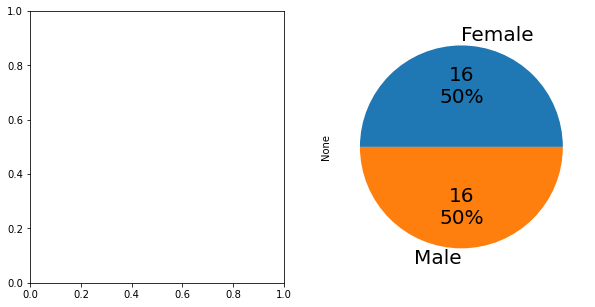

In [37]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

df.groupby('Gender').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},ax=ax2)

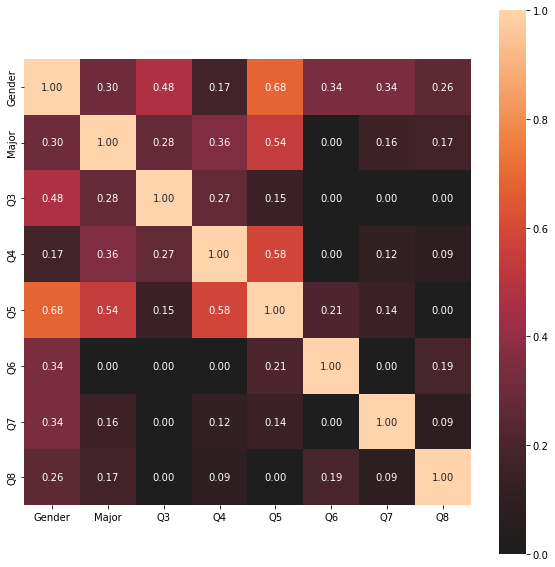

In [38]:
from dython.nominal import associations

categorical_correlation = associations(df, figsize=(10,10))

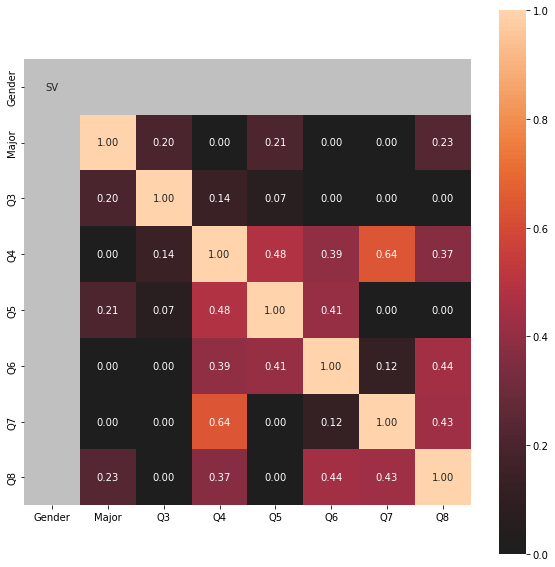

In [40]:
women_df = df.loc[df['Gender'] == "Female"]
categorical_correlation_women = associations(women_df, figsize=(10,10))

In [43]:
df['Q3'].replace(['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'],
                        [5,4,3,2,1], inplace=True)

df['Q4'].replace(['All the time', 'Frequently', 'Sometimes', 'Rarely', 'Never'],
                        [5,4,3,2,1], inplace=True)

df['Q5'].replace(['All the time', 'Frequently', 'Sometimes', 'Rarely', 'Never'],
                        [5,4,3,2,1], inplace=True)

df['Q6'].replace(['Strongly Agree', 'Agree', 'Neutral', 'Disagree', 'Strongly Disagree'],
                        [5,4,3,2,1], inplace=True)

df['Q7'].replace(['All the time', 'Frequently', 'Sometimes', 'Rarely', 'Never'],
                        [5,4,3,2,1], inplace=True)

df['Q8'].replace(['Strongly Agree', 'Somewhat Agree', 'Neutral', 'Somewhat Disagree', 'Strongly Disagree'],
                        [5,4,3,2,1], inplace=True)

df.head()



,Gender,Major,Q3,Q4,Q5,Q6,Q7,Q8
0,Male,Computer Science or Computer Engineering,4,1,1,5,3,1
1,Female,Information Science,2,4,3,4,2,1
2,Female,Any other STEM major,2,4,4,3,3,2
3,Male,Any Engineering Discipline,5,1,1,4,4,1
4,Male,Any other STEM major,4,3,1,3,2,1
5,Male,Any Engineering Discipline,1,1,1,4,2,1
6,Male,Any Engineering Discipline,4,2,1,4,2,3
7,Male,Any Engineering Discipline,4,2,2,5,3,3
8,Female,Any other STEM major,5,3,4,5,4,4
9,Male,Iâm in high school,4,3,5,4,1,3


In [47]:
questions = ['Q3','Q4','Q5','Q6','Q7','Q8']
print(df.groupby('Gender')[questions].mean())

            Q3      Q4      Q5     Q6      Q7      Q8
Gender                                               
Female  3.6250  2.0625  2.3125  3.125  2.6250  1.9375
Male    3.8125  1.5625  1.3125  3.625  2.1875  2.0000
